In [1]:
#基础
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#时间、日期
import time
import datetime
from datetime import datetime


#多行打印结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # 默认为'last'，即输出最后一个结果

# 01对话意图识别

In [6]:
# 读取数据集，这里是直接联网读取，也可以通过下载文件，再读取
import pandas as pd

data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)

train_data[1].value_counts()

train_data[0].apply(len).describe()

1
FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: count, dtype: int64

count    12100.000000
mean        15.138678
std          4.872583
min          4.000000
25%         12.000000
50%         15.000000
75%         18.000000
max         54.000000
Name: 0, dtype: float64

In [3]:
train_data.head()

,0,1
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


In [4]:
test_data.head()

,0
0,回放CCTV2的消费主张
1,给我打开玩具房的灯
2,循环播放赵本山的小品相亲来听
3,15号上午10点带孩子去海洋馆的行程帮我制定下。
4,把智能扫地机器人关掉


In [7]:
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import jieba

In [8]:
# 中文分词
content = ''.join(train_data[train_data[1] == 'Music-Play'][0])
words = jieba.lcut(content)


Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.863 seconds.
Prefix dict has been built successfully.


In [9]:
len(words)
words[:5]

11393

['随便', '播放', '一首', '专辑', '阁楼']

In [10]:
# 读取中文停用词
cn_stopwords = ' '.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
words = [x for x in words if x not in cn_stopwords]

In [11]:
len(words)
words[:5]

6792

['随便', '播放', '一首', '专辑', '阁楼']

([], [])

([], [])

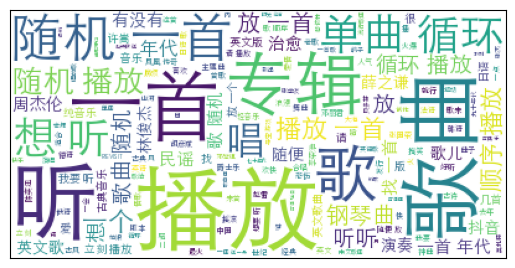

In [14]:
# 中文字体，https://mirror.coggle.club/STHeiti-Light.ttc
# 手动下载中文字体到当前代码目录
wordcloud = WordCloud(background_color = 'white', max_words = 1000, font_path = 'STHeiti-Light.ttc')
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])

# 02-正则关键词

In [15]:
# 读取数据集，这里是直接联网读取，也可以通过下载文件，再读取
data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)

train_text = '。'.join(list(train_data[0]))
train_words = jieba.lcut(train_text)

cn_stopwords = ' '.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])

#去除停用词
train_words = [x for x in train_words if x not in cn_stopwords]
print('\n\n单词个数：' ,len(train_words), "\n部分单词展示：" ,train_words[:50])

#去除单字
train_words = [x for x in train_words if len(x) > 1]
print('\n\n单词个数：' ,len(train_words), "\n部分单词展示：" ,train_words[:50])

#去除纯数字
train_words = [x for x in train_words if not x.isdigit()]
print('\n\n单词个数：' ,len(train_words), "\n部分单词展示：" ,train_words[:50])



单词个数： 77637 
部分单词展示： ['双鸭山', '淮阴', '汽车票', '13', '号', '。', '回家', '。', '随便', '播放', '一首', '专辑', '阁楼', '佛里', '歌', '。', '墓', '王之王', '。', '想', '挑战', '两把', 's686', '突变', '团', '竞', '游戏', '视频', '。', '想', '和平', '精英', '战神', '必备', '技巧', '游戏', '视频', '。', '2019', '古装', '爱情', '电视剧', '小女', '花不弃', '花絮', '播放', '。', '找', '一个', '2004']


单词个数： 52571 
部分单词展示： ['双鸭山', '淮阴', '汽车票', '13', '回家', '随便', '播放', '一首', '专辑', '阁楼', '佛里', '王之王', '挑战', '两把', 's686', '突变', '游戏', '视频', '和平', '精英', '战神', '必备', '技巧', '游戏', '视频', '2019', '古装', '爱情', '电视剧', '小女', '花不弃', '花絮', '播放', '一个', '2004', '推理', '剧给', '一会', '自驾游', '深圳', '地方', '转播', '女子双打', '乒乓球', '比赛', '现场', '单曲', '循环', '一首', '催眠']


单词个数： 50298 
部分单词展示： ['双鸭山', '淮阴', '汽车票', '回家', '随便', '播放', '一首', '专辑', '阁楼', '佛里', '王之王', '挑战', '两把', 's686', '突变', '游戏', '视频', '和平', '精英', '战神', '必备', '技巧', '游戏', '视频', '古装', '爱情', '电视剧', '小女', '花不弃', '花絮', '播放', '一个', '推理', '剧给', '一会', '自驾游', '深圳', '地方', '转播', '女子双打', '乒乓球', '比赛', '现场', '单曲', '循环', '一首', '催眠', '播放', '曹盾', '导演']


In [16]:
#筛选出词频大于5的单词
from collections import Counter
train_words_freq = Counter(train_words)
train_words = [x for x in train_words if train_words_freq[x] >= 5]

In [17]:
print('单词个数：' ,len(train_words), "\n部分单词展示：" ,train_words[:50])

单词个数： 38266 
部分单词展示： ['汽车票', '回家', '随便', '播放', '一首', '专辑', '挑战', '游戏', '视频', '和平', '精英', '游戏', '视频', '古装', '爱情', '电视剧', '花絮', '播放', '一个', '推理', '一会', '深圳', '地方', '转播', '比赛', '现场', '单曲', '循环', '一首', '播放', '导演', '古装', '河南', '新闻广播', '新闻台', '交通', '武汉', '交通', '广播电台', '一个', '播放', '王菲', '经典音乐', '一个', '世界', '比赛', '视频', '播放', '钢琴曲', '早上']


In [18]:
train_word_prior = {}
for row in train_data.iloc[:].itertuples():
    text, label = row[1], row[2]
    words = jieba.lcut(text)
    words = [x for x in words if x in train_words]

    if len(words) == 0:
        continue

    for word in words:
        if word not in train_word_prior:
            train_word_prior[word] = {"total": 0}

        if label not in  train_word_prior[word]:
            train_word_prior[word][label] = 0

        train_word_prior[word][label] += 1
        train_word_prior[word]["total"] += 1

In [19]:
len(train_word_prior)

1454

In [20]:
type(train_word_prior)

dict

In [21]:
train_word_prior = pd.DataFrame(train_word_prior).T
train_word_prior.fillna(0, inplace=True)

In [22]:
train_word_prior.head()

,total,Travel-Query,Music-Play,Alarm-Update,Video-Play,FilmTele-Play,Radio-Listen,Audio-Play,Other,TVProgram-Play,Weather-Query,HomeAppliance-Control,Calendar-Query
汽车票,39.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
回家,20.0,8.0,3.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
随便,91.0,0.0,30.0,0.0,26.0,15.0,9.0,6.0,4.0,1.0,0.0,0.0,0.0
播放,1729.0,0.0,464.0,0.0,310.0,589.0,180.0,58.0,6.0,69.0,48.0,5.0,0.0
一首,406.0,0.0,391.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0


In [23]:
for category in train_data[1].unique():
    train_word_prior[category] /= train_word_prior['total']

In [24]:
train_word_prior['category'] = train_word_prior.columns[1:][train_word_prior.values[:, 1:].argmax(1)]
train_word_prior.groupby('category').apply(lambda x: list(x.index))

category
Alarm-Update             [早上, 我定, 下午, 参加, 公司, 闹钟, 活动, 提醒, 创建, 周末, 上午, 取...
Audio-Play               [故事, 小说, 广播剧, 英文版, 岳云鹏, 爆笑, 相声, 有声, 俄语, 第五章, 郭...
Calendar-Query           [昨天, 农历, 我查, 星期, 几号, 告诉, 几月, 查查, 礼拜, 几是, 春节, 母...
FilmTele-Play            [播放, 古装, 爱情, 电视剧, 一个, 推理, 一会, 地方, 导演, 赵丽颖, 麻烦,...
HomeAppliance-Control    [空调, 客厅, 风速, 打开, 烤箱, 儿童房, 调高, 洗衣机, 停止, 工作, 模式,...
Music-Play               [随便, 一首, 专辑, 单曲, 循环, 王菲, 钢琴曲, 随机, 治愈, 日语, 歌曲, ...
Other                                     [永远, 电话, 笑话, 之间, 老婆, 不好, 漫画, 有人]
Radio-Listen             [河南, 新闻广播, 新闻台, 交通, 广播电台, 经典音乐, 七点, 中央, 电台, 都市...
TVProgram-Play           [播出, 卫视, 广西, 法治, CCTV11, 剧场, 开播, 文化, 结束, 早间, 贵...
Travel-Query             [汽车票, 回家, 深圳, 武汉, 北京, 桂林, 飞机, 起飞, 快点, 三张, 成都, ...
Video-Play               [挑战, 游戏, 视频, 和平, 精英, 花絮, 转播, 比赛, 现场, 世界, 年谍, 第...
Weather-Query            [查询, 海南, 几级, 刮风, 几天, 山西, 明天, 衡水, 气温, 适合, 杭州, 香...
dtype: object

# 03-TFIDF文本分类

In [25]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt

# 读取数据集，这里是直接联网读取，也可以通过下载文件，再读取
data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)

cn_stopwords = pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0].values

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    tokenizer=jieba.lcut,
    stop_words=list(cn_stopwords)
)
train_tfidf = tfidf.fit_transform(train_data[0])
test_tfidf = tfidf.transform(test_data[0])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [28]:
train_tfidf.shape
train_data.shape

(12100, 10694)

(12100, 2)

In [29]:
train_data.head()

,0,1
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


In [37]:
train_tfidf[:][1]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 10694)>

In [31]:
cv_pred = cross_val_predict(
    LogisticRegression(),
    train_tfidf, train_data[1]
)
print(classification_report(train_data[1], cv_pred))

                       precision    recall  f1-score   support

         Alarm-Update       0.98      0.93      0.96      1264
           Audio-Play       0.74      0.50      0.60       226
       Calendar-Query       0.99      0.95      0.97      1214
        FilmTele-Play       0.70      0.93      0.80      1355
HomeAppliance-Control       0.94      0.97      0.96      1215
           Music-Play       0.88      0.87      0.87      1304
                Other       0.39      0.07      0.11       214
         Radio-Listen       0.94      0.89      0.91      1285
       TVProgram-Play       0.72      0.45      0.55       240
         Travel-Query       0.92      0.96      0.94      1220
           Video-Play       0.90      0.87      0.89      1334
        Weather-Query       0.92      0.96      0.94      1229

             accuracy                           0.89     12100
            macro avg       0.84      0.78      0.79     12100
         weighted avg       0.89      0.89      0.89 

# 04-词向量训练与使用

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=common_texts, vector_size=100, window=5, min_count=1, workers=4)

In [40]:
import pandas as pd
import numpy as np
import jieba

data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)
train_data[0] = train_data[0].apply(jieba.lcut)
test_data[0] = test_data[0].apply(jieba.lcut)

In [41]:
model = Word2Vec(
    sentences=list(train_data[0].values[:]) + list(test_data[0].values[:]), 
vector_size=30, window=5, min_count=1, workers=4)

In [42]:
model.wv.most_similar('打开')

[('这时候', 0.9908555746078491),
 ('加湿器', 0.9898401498794556),
 ('关掉', 0.9855853319168091),
 ('热水器', 0.9844029545783997),
 ('开启', 0.9794743657112122),
 ('，', 0.9792748093605042),
 ('洗衣机', 0.9790416955947876),
 ('灯', 0.9781801104545593),
 ('关机', 0.9778523445129395),
 ('冰箱', 0.9769521951675415)]

In [43]:
train_w2v = train_data[0].apply(lambda x: model.wv[x].mean(0))
test_w2v = test_data[0].apply(lambda x: model.wv[x].mean(0))

train_w2v = np.vstack(train_w2v)
test_w2v = np.vstack(test_w2v)

In [44]:
cv_pred = cross_val_predict(
    LinearSVC(),
    train_w2v, train_data[1]
)
print(classification_report(train_data[1], cv_pred))

                       precision    recall  f1-score   support

         Alarm-Update       0.91      0.94      0.92      1264
           Audio-Play       0.00      0.00      0.00       226
       Calendar-Query       0.92      0.97      0.95      1214
        FilmTele-Play       0.56      0.62      0.59      1355
HomeAppliance-Control       0.85      0.92      0.89      1215
           Music-Play       0.72      0.78      0.75      1304
                Other       0.11      0.00      0.01       214
         Radio-Listen       0.84      0.83      0.84      1285
       TVProgram-Play       0.70      0.03      0.06       240
         Travel-Query       0.85      0.92      0.88      1220
           Video-Play       0.69      0.74      0.72      1334
        Weather-Query       0.82      0.84      0.83      1229

             accuracy                           0.79     12100
            macro avg       0.66      0.63      0.62     12100
         weighted avg       0.76      0.79      0.77 

# 05-FastText文本分类

In [55]:
#import torch
import jieba
import pandas as pd

data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)

In [56]:
train_data.head()

,0,1
0,还有双鸭山到淮阴的汽车票吗13号的,Travel-Query
1,从这里怎么回家,Travel-Query
2,随便播放一首专辑阁楼里的佛里的歌,Music-Play
3,给看一下墓王之王嘛,FilmTele-Play
4,我想看挑战两把s686打突变团竞的游戏视频,Video-Play


In [57]:
train_data[1]

0                 Travel-Query
1                 Travel-Query
2                   Music-Play
3                FilmTele-Play
4                   Video-Play
                 ...          
12095           Calendar-Query
12096    HomeAppliance-Control
12097             Radio-Listen
12098               Video-Play
12099             Alarm-Update
Name: 1, Length: 12100, dtype: object

In [58]:
train_data[1], lbl = pd.factorize(train_data[1])

In [59]:
train_data[1]

0        0
1        0
2        1
3        2
4        3
        ..
12095    8
12096    5
12097    4
12098    3
12099    7
Name: 1, Length: 12100, dtype: int64

In [60]:
lbl

Index(['Travel-Query', 'Music-Play', 'FilmTele-Play', 'Video-Play',
       'Radio-Listen', 'HomeAppliance-Control', 'Weather-Query',
       'Alarm-Update', 'Calendar-Query', 'TVProgram-Play', 'Audio-Play',
       'Other'],
      dtype='object')

In [61]:
def coustom_data_iter(texts, labels):
    for x, y in zip(texts, labels):
        yield x, y

In [62]:
train_iter = coustom_data_iter(train_data[0].values[:], train_data[1].values[:])

In [63]:
next(train_iter)

('还有双鸭山到淮阴的汽车票吗13号的', 0)

In [67]:
import paddle as torch
import paddle

In [66]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = jieba.lcut

def yield_tokens(data_iter):
    for text, _ in data_iter:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])

ModuleNotFoundError: No module named 'paddle.data'

# 06-LSTM文本分类.ipynb

# 08-BERT文本分类.ipynb

# 09-BERT高效微调.ipynb

# 10-T5加载与使用.ipynb

# 11-T5微调文本分类.ipynb

# 12-Qwen大模型加载与使用.ipynb

# 13-Qwen大模型微调文本分类.ipynb